In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
import sys

# Dataset
O dataset utilizado, nomeado "Behavioral Risk Factor Surveillance System”, é público e pode ser obtido como demonstrado abaixo. Além da sucinta explicação dada para cada atributo utilizado neste trabalho, pode-se encontrar mais detalhes no [seguinte relatório](https://www.cdc.gov/brfss/annual_data/2013/pdf/codebook13_llcp.pdf).

In [ ]:
!curl -L -o ./behavioral-risk-factor-surveillance-system.zip https://www.kaggle.com/api/v1/datasets/download/cdc/behavioral-risk-factor-surveillance-system
!unzip -o -j "behavioral-risk-factor-surveillance-system.zip" "2013.csv" -d "."

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  414M  100  414M    0     0   147M      0  0:00:02  0:00:02 --:--:--  168M
Archive:  behavioral-risk-factor-surveillance-system.zip
  inflating: ./2013.csv              


In [ ]:
brfss2013 = pd.read_csv("2013.csv")

Indicadores tratados como importante para a predição:

* GENHLTH
* PHYSHLTH
* MENTHLTH
* POORHLTH
* HLTHPLN1
* PERSDOC2
* DIFFWALK
* MEDCOST
* CHECKUP1
* _RFHYPE5
* _RFCHOL
* CVDINFR4
* CVDCRHD4
* CVDSTRK3
* ADDEPEV2
* CHCKIDNY
* SEX
* _AGEG5YR
* _EDUCAG
* EMPLOY1
* _INCOMG
* _BMI5CAT
* _SMOKER3
* AVEDRNK2
* _FRTLT1
* _VEGLT1
* _TOTINDA
* DIABETE3

In [ ]:
attributes = ["GENHLTH","PHYSHLTH","MENTHLTH","HLTHPLN1","PERSDOC2","DIFFWALK","MEDCOST","CHECKUP1",
"_RFHYPE5","_RFCHOL","CVDINFR4","CVDCRHD4","CVDSTRK3","ADDEPEV2","CHCKIDNY","SEX","_AGEG5YR",
"_EDUCAG","EMPLOY1","_INCOMG","_BMI5CAT","_SMOKER3","AVEDRNK2","ALCDAY5","_FRTLT1","_VEGLT1","_TOTINDA","DIABETE3" ]

In [ ]:
brfss_df_selected = brfss2013[attributes].copy()
brfss_df_selected.shape

(491773, 28)

In [ ]:
brfss_df_selected.columns

Index(['GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'HLTHPLN1', 'PERSDOC2', 'DIFFWALK',
       'MEDCOST', 'CHECKUP1', '_RFHYPE5', '_RFCHOL', 'CVDINFR4', 'CVDCRHD4',
       'CVDSTRK3', 'ADDEPEV2', 'CHCKIDNY', 'SEX', '_AGEG5YR', '_EDUCAG',
       'EMPLOY1', '_INCOMG', '_BMI5CAT', '_SMOKER3', 'AVEDRNK2', 'ALCDAY5',
       '_FRTLT1', '_VEGLT1', '_TOTINDA', 'DIABETE3'],
      dtype='object')

In [ ]:
brfss_df_selected.head()

,GENHLTH,PHYSHLTH,MENTHLTH,HLTHPLN1,PERSDOC2,DIFFWALK,MEDCOST,CHECKUP1,_RFHYPE5,_RFCHOL,...,EMPLOY1,_INCOMG,_BMI5CAT,_SMOKER3,AVEDRNK2,ALCDAY5,_FRTLT1,_VEGLT1,_TOTINDA,DIABETE3
0,4.0,30.0,29.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,...,7.0,5.0,4.0,3.0,2.0,201.0,1.0,9.0,2.0,3.0
1,3.0,88.0,88.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,...,1.0,5.0,1.0,4.0,NaN,888.0,2.0,1.0,1.0,3.0
2,3.0,3.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,5.0,3.0,2.0,4.0,220.0,2.0,1.0,2.0,3.0
3,2.0,2.0,88.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,...,7.0,5.0,2.0,4.0,2.0,208.0,2.0,1.0,1.0,3.0
4,3.0,10.0,2.0,1.0,1.0,2.0,2.0,4.0,2.0,1.0,...,7.0,4.0,4.0,3.0,2.0,210.0,2.0,1.0,2.0,3.0


# Limpeza de dados
Nesta sessão sera realizada a limpeza de dados a partir de cada atributo utilizado no dataset, removendo dados que possuem valores equivalentes a ausência de resposta ou dados incompatíveis com o dado trabalho.

In [ ]:
# corrigindo problema da média de drinks por semana igual a 0 ser ignorada
brfss_df_selected.loc[brfss_df_selected['ALCDAY5'] == 888, 'AVEDRNK2'] = 0
brfss_df_selected.drop(columns=['ALCDAY5'], inplace=True)

# removendo dados com colunas sem valores
brfss_df_selected = brfss_df_selected.dropna()
brfss_df_selected.shape

(388880, 27)

In [ ]:
# GENHLTH
# utilizado: 1-5 nível de saúde
# não utilizado: 7, 9 -> não respondido
brfss_df_selected = brfss_df_selected[~brfss_df_selected['GENHLTH'].isin([7, 9])].copy()
print(brfss_df_selected['GENHLTH'].unique(), brfss_df_selected.shape)

# PHYSHLTH
# utilizado: 1-30 dias, 88 = 0 dias
# não utilizado: 77, 99 -> não respondido
brfss_df_selected = brfss_df_selected[((brfss_df_selected['PHYSHLTH'] >= 0) & (brfss_df_selected['PHYSHLTH'] <= 30)) | (brfss_df_selected['PHYSHLTH'] == 88)].copy()
brfss_df_selected.loc[:, 'PHYSHLTH'] = brfss_df_selected['PHYSHLTH'].replace({88: 0})
print(brfss_df_selected['PHYSHLTH'].unique(), brfss_df_selected.shape)

# MENTHLTH
# utilizado: 1-30 dias, 88 = 0 dias
# não utilizado: 77, 99 -> não respondido
brfss_df_selected = brfss_df_selected[((brfss_df_selected['MENTHLTH'] >= 0) & (brfss_df_selected['MENTHLTH'] <= 30)) | (brfss_df_selected['MENTHLTH'] == 88)].copy()
brfss_df_selected.loc[:, 'MENTHLTH'] = brfss_df_selected['MENTHLTH'].replace({88: 0})
print(brfss_df_selected['MENTHLTH'].unique(), brfss_df_selected.shape)

# HLTHPLN1
# utilizado: 1 (1), 0 (2) -> possui ou não
# não utilizado: 7, 9 -> não respondido
brfss_df_selected = brfss_df_selected[~brfss_df_selected['HLTHPLN1'].isin([7, 9])].copy()
brfss_df_selected.loc[:, 'HLTHPLN1'] = brfss_df_selected['HLTHPLN1'].replace({2: 0})
print(brfss_df_selected['HLTHPLN1'].unique(), brfss_df_selected.shape)

# PERSDOC2
# utilizado: 1 (1, 2), 0 (3) -> possui ou não
# não utilizado: 7, 9 -> não respondido
brfss_df_selected = brfss_df_selected[~brfss_df_selected['PERSDOC2'].isin([7, 9])].copy()
brfss_df_selected.loc[:, 'PERSDOC2'] = brfss_df_selected['PERSDOC2'].replace({1: 1, 2: 1, 3: 0})
print(brfss_df_selected['PERSDOC2'].unique(), brfss_df_selected.shape)

# DIFFWALK
# utilizado: 1 (1), 0 (2) -> possui ou não
# não utilizado: 7, 9 -> não respondido
brfss_df_selected = brfss_df_selected[~brfss_df_selected['DIFFWALK'].isin([7, 9])].copy()
brfss_df_selected.loc[:, 'DIFFWALK'] = brfss_df_selected['DIFFWALK'].replace({2: 0})
print(brfss_df_selected['DIFFWALK'].unique(), brfss_df_selected.shape)

# MEDCOST
# utilizado: 1 (1), 0 (2) -> sim ou não
# não utilizado: 7, 9 -> não respondido
brfss_df_selected = brfss_df_selected[~brfss_df_selected['MEDCOST'].isin([7, 9])].copy()
brfss_df_selected.loc[:, 'MEDCOST'] = brfss_df_selected['MEDCOST'].replace({2: 0})
print(brfss_df_selected['MEDCOST'].unique(), brfss_df_selected.shape)

# CHECKUP1
# utilizado: 1-4, 0 (8) -> tempo desde o ultimo checkup ou nunca
# não utilizado: 7, 9 -> não respondido
brfss_df_selected.loc[:, 'CHECKUP1'] = brfss_df_selected['CHECKUP1'].replace({8:0})
brfss_df_selected = brfss_df_selected[~brfss_df_selected.CHECKUP1.isin([7, 9])]
print(brfss_df_selected.CHECKUP1.unique(), brfss_df_selected.shape)

# _RFHYPE5
# utilizado: 0 (1), 1 (2) -> sim ou não
# não utilizado: 9 -> não respondido
brfss_df_selected.loc[:, '_RFHYPE5'] = brfss_df_selected["_RFHYPE5"].replace({1: 0, 2: 1}).astype(int)
brfss_df_selected = brfss_df_selected[brfss_df_selected._RFHYPE5 != 9]
print(brfss_df_selected._RFHYPE5.unique(), brfss_df_selected.shape)

# _RFCHOL
# utilizado: 0 (1), 1 (2) -> sim ou não
# não utilizado: 9 -> não respondido
brfss_df_selected.loc[:, '_RFCHOL'] = brfss_df_selected['_RFCHOL'].replace({1:0, 2:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected._RFCHOL != 9]
print(brfss_df_selected._RFCHOL.unique(), brfss_df_selected.shape)

# CVDINFR4
# utilizado: 1, 0 (2) -> sim ou não
# não utilizado: 7, 9 -> não respondido
brfss_df_selected.loc[:, 'CVDINFR4'] = brfss_df_selected['CVDINFR4'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.CVDINFR4 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.CVDINFR4 != 9]
print(brfss_df_selected.CVDINFR4.unique(), brfss_df_selected.shape)

# CVDCRHD4
# utilizado: 1, 0 (2) -> sim ou não
# não utilizado: 7, 9 -> não respondido
brfss_df_selected.loc[:, 'CVDCRHD4'] = brfss_df_selected['CVDCRHD4'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.CVDCRHD4 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.CVDCRHD4 != 9]
print(brfss_df_selected.CVDCRHD4.unique(), brfss_df_selected.shape)

# CVDSTRK3
# utilizado: 1, 0 (2) -> sim ou não
# não utilizado: 7, 9 -> não respondido
brfss_df_selected.loc[:, 'CVDSTRK3'] = brfss_df_selected['CVDSTRK3'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.CVDSTRK3 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.CVDSTRK3 != 9]
print(brfss_df_selected.CVDSTRK3.unique(), brfss_df_selected.shape)

# ADDEPEV2
# utilizado: 1, 0 (2) -> sim ou não
# não utilizado:  7, 9 -> não respondido
brfss_df_selected.loc[:, 'ADDEPEV2'] = brfss_df_selected['ADDEPEV2'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.ADDEPEV2 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.ADDEPEV2 != 9]
print(brfss_df_selected.ADDEPEV2.unique(), brfss_df_selected.shape)

# CHCKIDNY
# utilizado: 1 (1), 0 (2) -> sim ou não
# não utilizado: 7, 9 -> não respondido
brfss_df_selected.loc[:, 'CHCKIDNY'] = brfss_df_selected['CHCKIDNY'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.CHCKIDNY != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.CHCKIDNY != 9]
print(brfss_df_selected['CHCKIDNY'].unique(), brfss_df_selected.shape)

# SEX
# utilizado: 1-2

# _AGEG5YR
# utilizado: 1-13 categorias de idade
# não utilizado: 14 -> não respondido
brfss_df_selected = brfss_df_selected[brfss_df_selected._AGEG5YR != 14]
print(brfss_df_selected['_AGEG5YR'].unique(), brfss_df_selected.shape)

# _EDUCAG
# utilizado: 1-4 nível de escolaridade
# não utilizado: 9 -> não respondido
brfss_df_selected['_EDUCAG'].replace({5:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected._EDUCAG != 9]
print(brfss_df_selected['_EDUCAG'].unique(), brfss_df_selected.shape)

# EMPLOY1
# utilizado: 1-8 situação empregatícia
# não utilizado: 9 -> não respondido
brfss_df_selected = brfss_df_selected[brfss_df_selected.EMPLOY1 != 9]
print(brfss_df_selected['EMPLOY1'].unique(), brfss_df_selected.shape)

# _INCOMG
# utilizado: 1-8 categorias de renda
# não utilizado: 9 -> não respondido
brfss_df_selected = brfss_df_selected[brfss_df_selected._INCOMG != 9]
print(brfss_df_selected['_INCOMG'].unique(), brfss_df_selected.shape)

# _BMI5CAT
# utilizado: 1-4 categoria BMI


# _SMOKER3
# utilizado: 1-4 nível de tabagismo
# não utilizado: 9 -> não respondido
brfss_df_selected = brfss_df_selected[brfss_df_selected._SMOKER3 != 9]
print(brfss_df_selected._SMOKER3.unique(), brfss_df_selected.shape)

# AVEDRNK2
# utilizado: 0-76 quantidade de doses alcoólicas por dia
# não utilizado: 77,99 -> não respondido
brfss_df_selected = brfss_df_selected[brfss_df_selected.AVEDRNK2 != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected.AVEDRNK2 != 99]
print(brfss_df_selected.AVEDRNK2.unique(), brfss_df_selected.shape)

# _FRTLT1
# utilizado: 1, 0(2) consumo de frutas por dia (uma ou mais - nenhuma)
# não utilizado: 9 -> não respondido
brfss_df_selected = brfss_df_selected[brfss_df_selected._FRTLT1 != 9]
brfss_df_selected.loc[:, '_FRTLT1'] = brfss_df_selected['_FRTLT1'].replace({2:0})
print(brfss_df_selected._FRTLT1.unique(), brfss_df_selected.shape)

# _VEGLT1
# utilizado: 1, 0(2) consumo de vegetais por dia (um ou mais - nenhum)
# não utilizado: 9 -> não respondido
brfss_df_selected = brfss_df_selected[brfss_df_selected._VEGLT1 != 9]
brfss_df_selected.loc[:, '_VEGLT1'] = brfss_df_selected['_VEGLT1'].replace({2:0})
print(brfss_df_selected._VEGLT1.unique(), brfss_df_selected.shape)

# _TOTINDA
# utilizado: 1 (1), 0 (2) -> sim ou não
# não utilizado: 9 -> não respondido
brfss_df_selected.loc[:, '_TOTINDA'] = brfss_df_selected['_TOTINDA'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected._TOTINDA != 9]
print(brfss_df_selected._TOTINDA.unique(), brfss_df_selected.shape)

# DIABETE3
# utilizado: 1 (1,2,4), 0 (3) -> tem/teve diabetes ou pré-diabetes - não teve
# não utilizado: 7,9,Nan -> não respondido
brfss_df_selected.loc[:, 'DIABETE3'] = brfss_df_selected['DIABETE3'].replace({3:0, 4:1, 2:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected.DIABETE3 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.DIABETE3 != 9]
print(brfss_df_selected.DIABETE3.unique(), brfss_df_selected.shape)


[4. 3. 2. 1. 5.] (387466, 27)
[30.  0.  3.  2. 10.  1. 14.  4. 15. 25.  5. 20. 28.  7.  8. 26. 12. 11.
 17.  6. 22. 21.  9. 29. 13. 16. 19. 18. 23. 27. 24.] (379850, 27)
[29.  0.  2. 15.  3.  5.  8.  7. 10. 30.  1.  4. 20. 21.  6. 14. 25. 26.
 12. 16. 28.  9. 13. 17. 27. 18. 24. 23. 11. 22. 19.] (375459, 27)
[1. 0.] (374684, 27)
[1. 0.] (373820, 27)
[1. 0.] (372828, 27)
[0. 1.] (372253, 27)
[1. 2. 4. 3. 0.] (369256, 27)
[1. 0.] (368694, 27)
[1. 0.] (366147, 27)
[0. 1.] (364685, 27)
[0. 1.] (362014, 27)
[0. 1.] (361338, 27)
[1. 0.] (360393, 27)
[0. 1.] (359590, 27)
[ 7.  8.  9. 10.  6.  4. 11. 12.  5.  3.  1. 13.  2.] (357717, 27)
[3. 4. 2. 1.] (357332, 27)
[1. 7. 5. 4. 8. 2. 6. 3.] (356437, 27)
[5. 4. 2. 1. 3.] (317072, 27)
[4. 2. 3. 1.] (316126, 27)
[ 0.  4.  2.  1.  3. 15.  6.  5.  8. 60. 12. 18. 10.  7.  9. 20. 24. 40.
 25. 30. 11. 16. 13. 28. 27. 21. 48. 14. 29. 50. 62. 32. 17. 45. 36. 26.
 22. 53. 23. 76. 72. 55. 19. 35. 42.] (314420, 27)
[0. 1.] (303013, 27)
[1. 0.] (295818, 27)


In [ ]:
# Removendo duplicatas
brfss_df_selected = brfss_df_selected.drop_duplicates().reset_index(drop=True)

#print(brfss_df_selected)
brfss_df_selected.shape

(274105, 27)

In [ ]:
brfss_df_selected = brfss_df_selected.rename(columns={
    'GENHLTH': 'GenHealth',
    'PHYSHLTH': 'phyHealthDays',
    'MENTHLTH': 'menHealthDays',
    'HLTHPLN1': 'hasHealthPlan',
    'PERSDOC2': 'hasPersonalDoctor',
    'DIFFWALK': 'diffWalking',
    'MEDCOST': 'costLimitation',
    'CHECKUP1': 'lastCheckup',
    '_RFHYPE5': 'hypertensionRisk',
    '_RFCHOL': 'cholesterolRisk',
    'CVDINFR4': 'hadHeartAttack',
    'CVDCRHD4': 'hadCHD',
    'CVDSTRK3': 'hadStroke',
    'ADDEPEV2': 'hadDepressiveDisorder',
    'CHCKIDNY': 'hadKidneyDisease',
    'SEX': 'gender',
    '_AGEG5YR': 'ageGroup',
    '_EDUCAG': 'educationLevel',
    'EMPLOY1': 'employmentStatus',
    '_INCOMG': 'incomeGroup',
    '_BMI5CAT': 'bmiCategory',
    '_SMOKER3': 'smokingStatus',
    'AVEDRNK2': 'DrinksPerDay',
    '_FRTLT1': 'dailyFruitConsumption',
    '_VEGLT1': 'dailyVegetableConsumption',
    '_TOTINDA': 'phyActivity',
    'DIABETE3': 'diabetes'
})

# Análise exploratória
Este tópico é voltado a analisar as features utilizadas no dataset. Informações importantes como correlação e balanceamento serão estudadas a fim de verificar a qualidade dos dados.

## Matriz de correlação

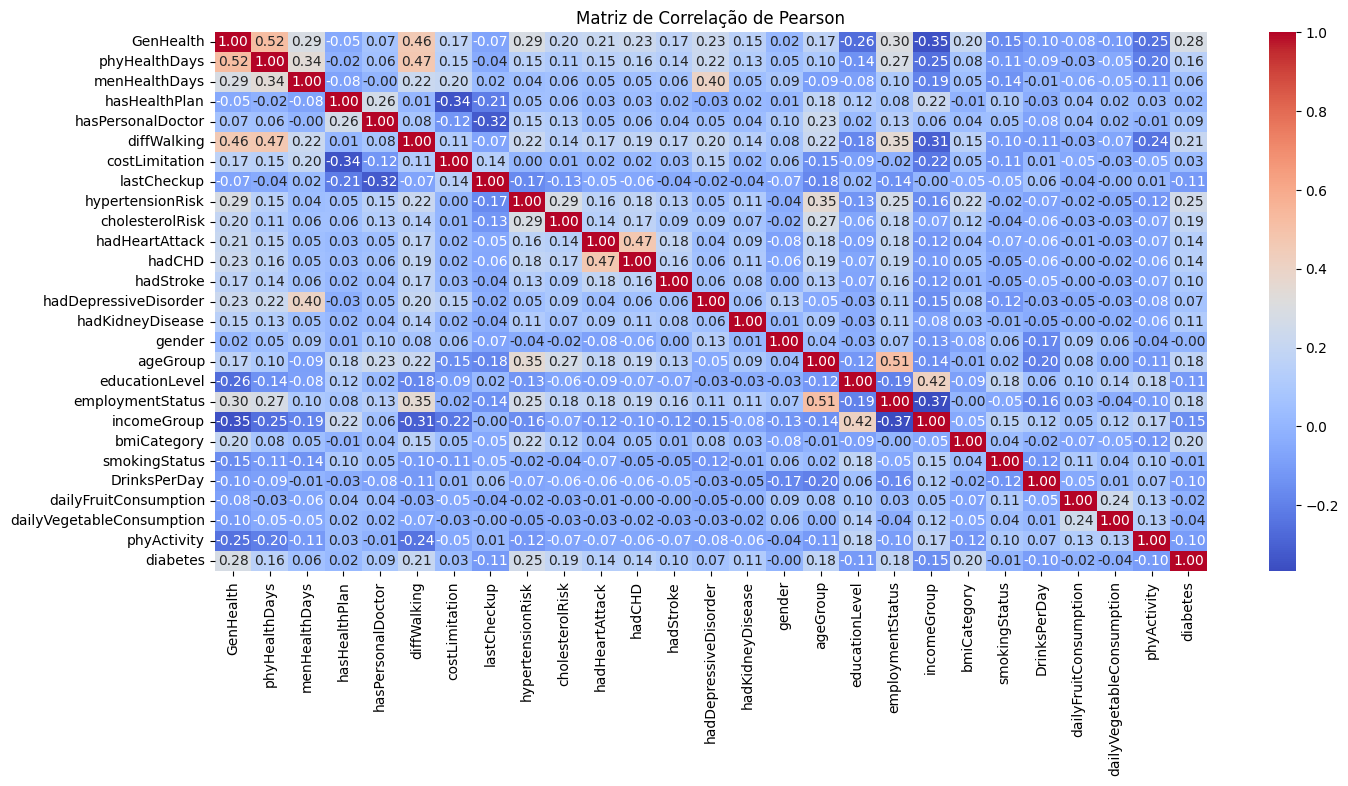

In [ ]:
# Calcular matriz de correlação de Pearson
correlation_matrix = brfss_df_selected.corr()

# Visualizar como heatmap
plt.figure(figsize=(16, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação de Pearson")
plt.show()

## Análise das features binárias


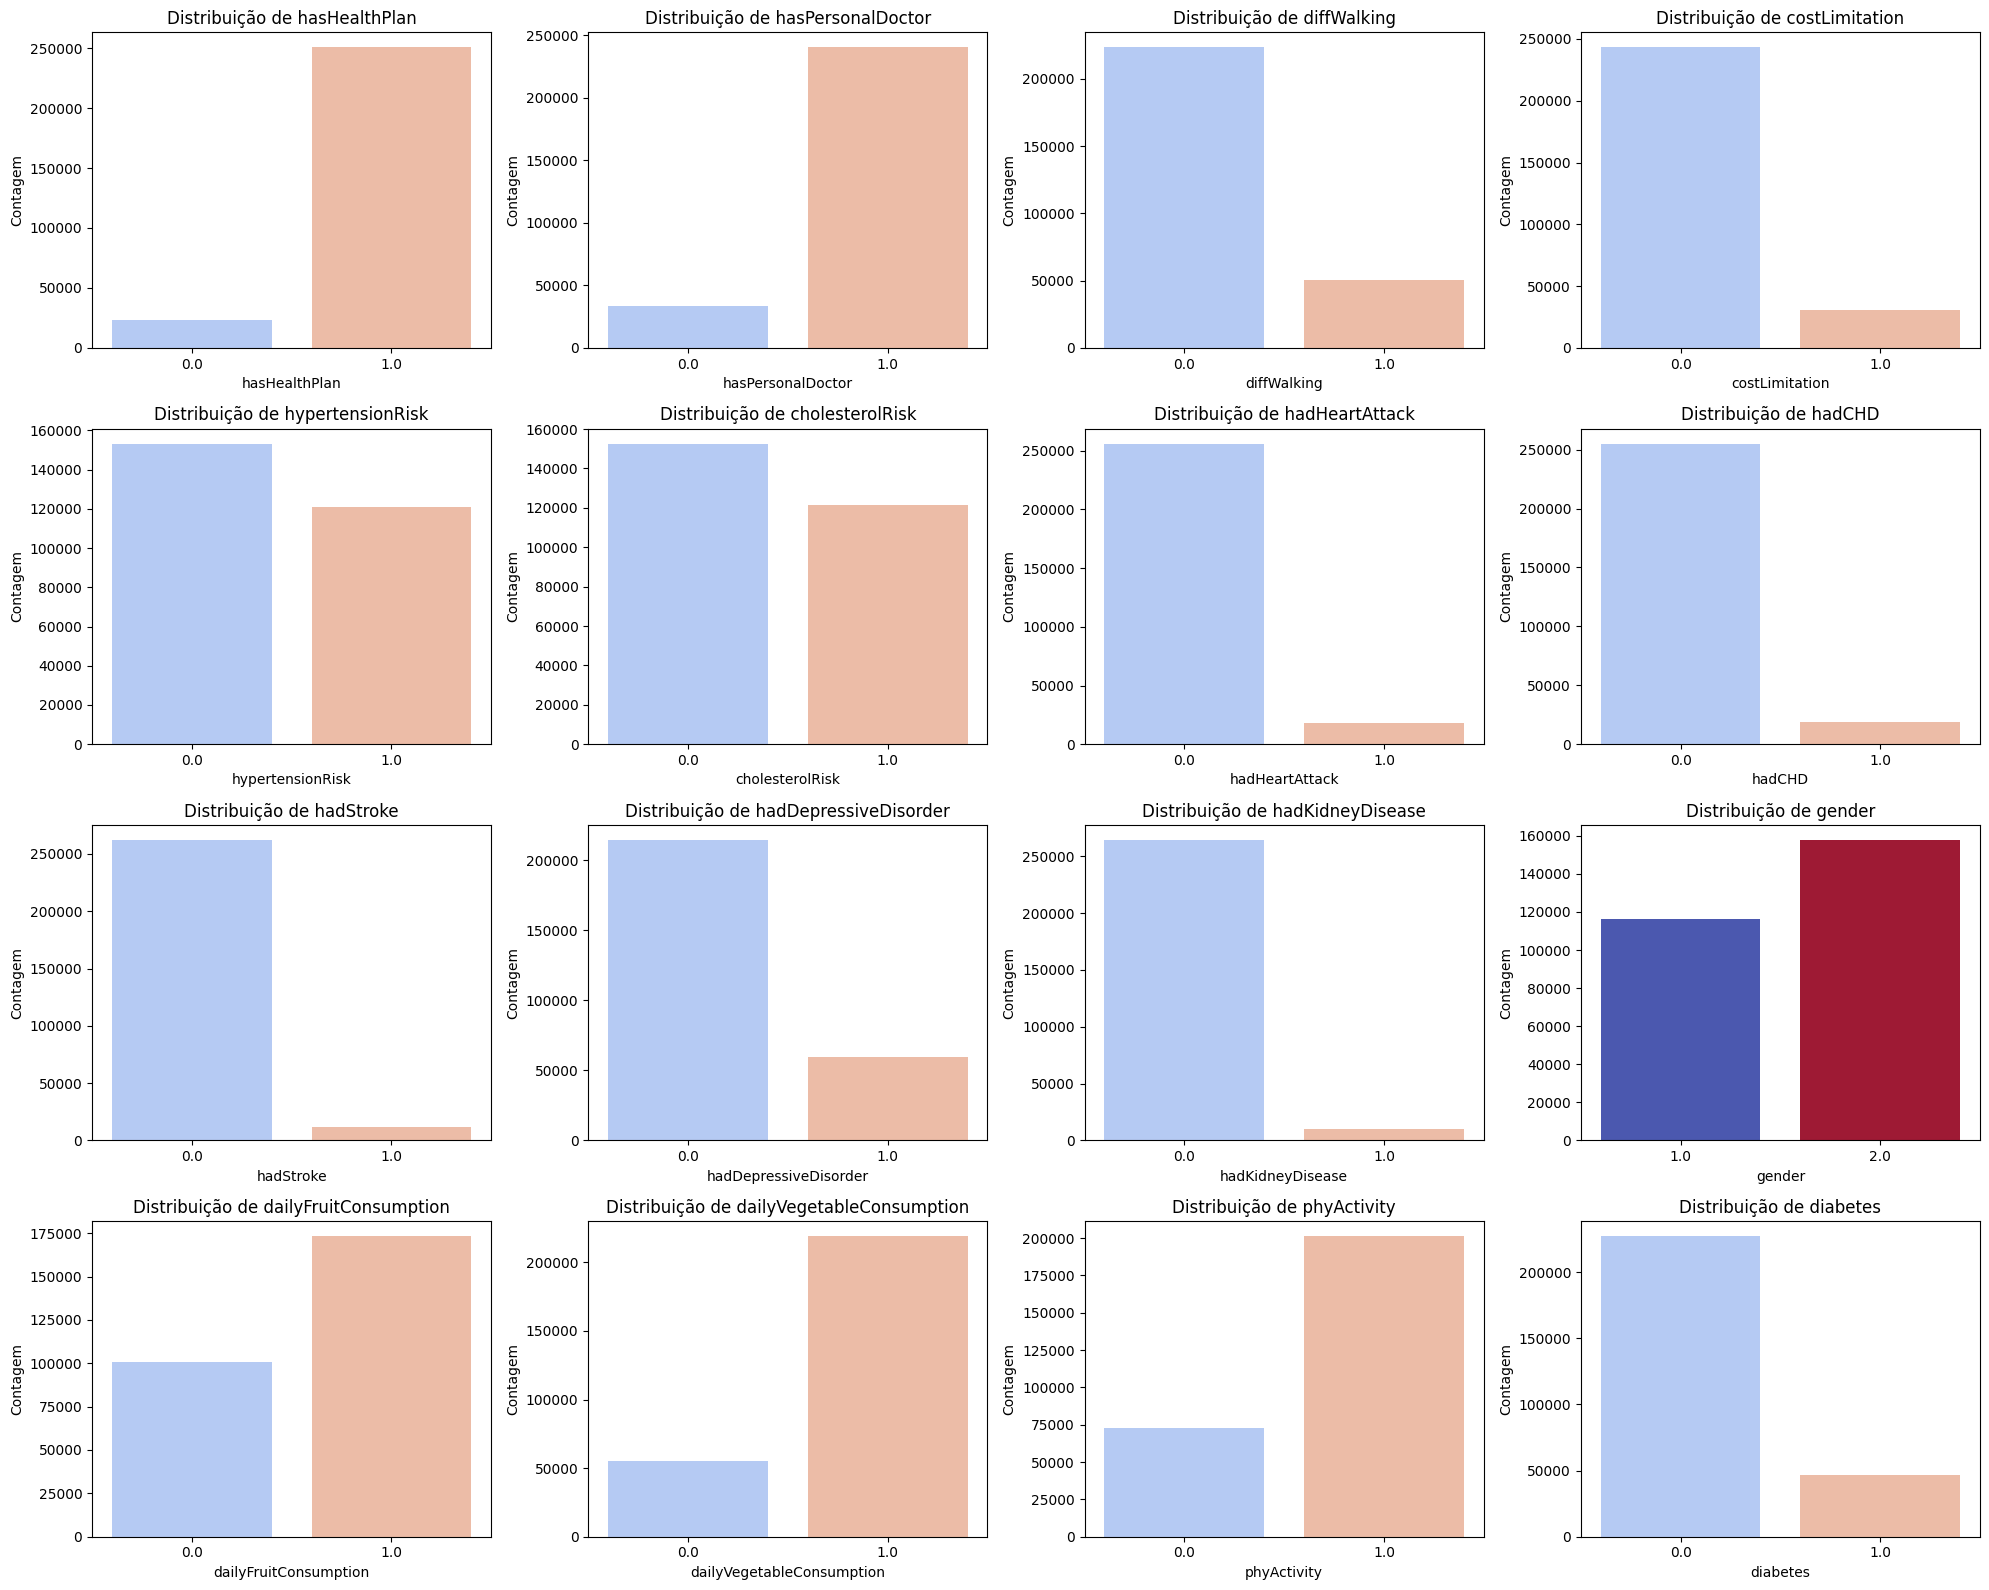

In [ ]:
# Encontrar colunas binárias (com apenas 2 valores únicos)
binary_columns = [col for col in brfss_df_selected.columns if brfss_df_selected[col].nunique() == 2]

num_cols = math.ceil(len(binary_columns) / 4)
num_rows = min(4, len(binary_columns))  # Garantir no máximo 4 linhas

# Criar subplots
fig, axes = plt.subplots(nrows=4, ncols=num_cols, figsize=(5 * num_cols, 4 * 4))
axes = axes.flatten()  # Garantir que podemos iterar sobre `axes`

# Loop para criar gráficos
for i, col in enumerate(binary_columns):
    sns.countplot(x=brfss_df_selected[col], hue=brfss_df_selected[col], palette='coolwarm', ax=axes[i], legend=False)
    axes[i].set_title(f'Distribuição de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Contagem')

for i in range(len(binary_columns), len(axes)):
    fig.delaxes(axes[i])

# Ajustar layout
plt.tight_layout()
plt.show()


## Análise das features com mais de duas categorias

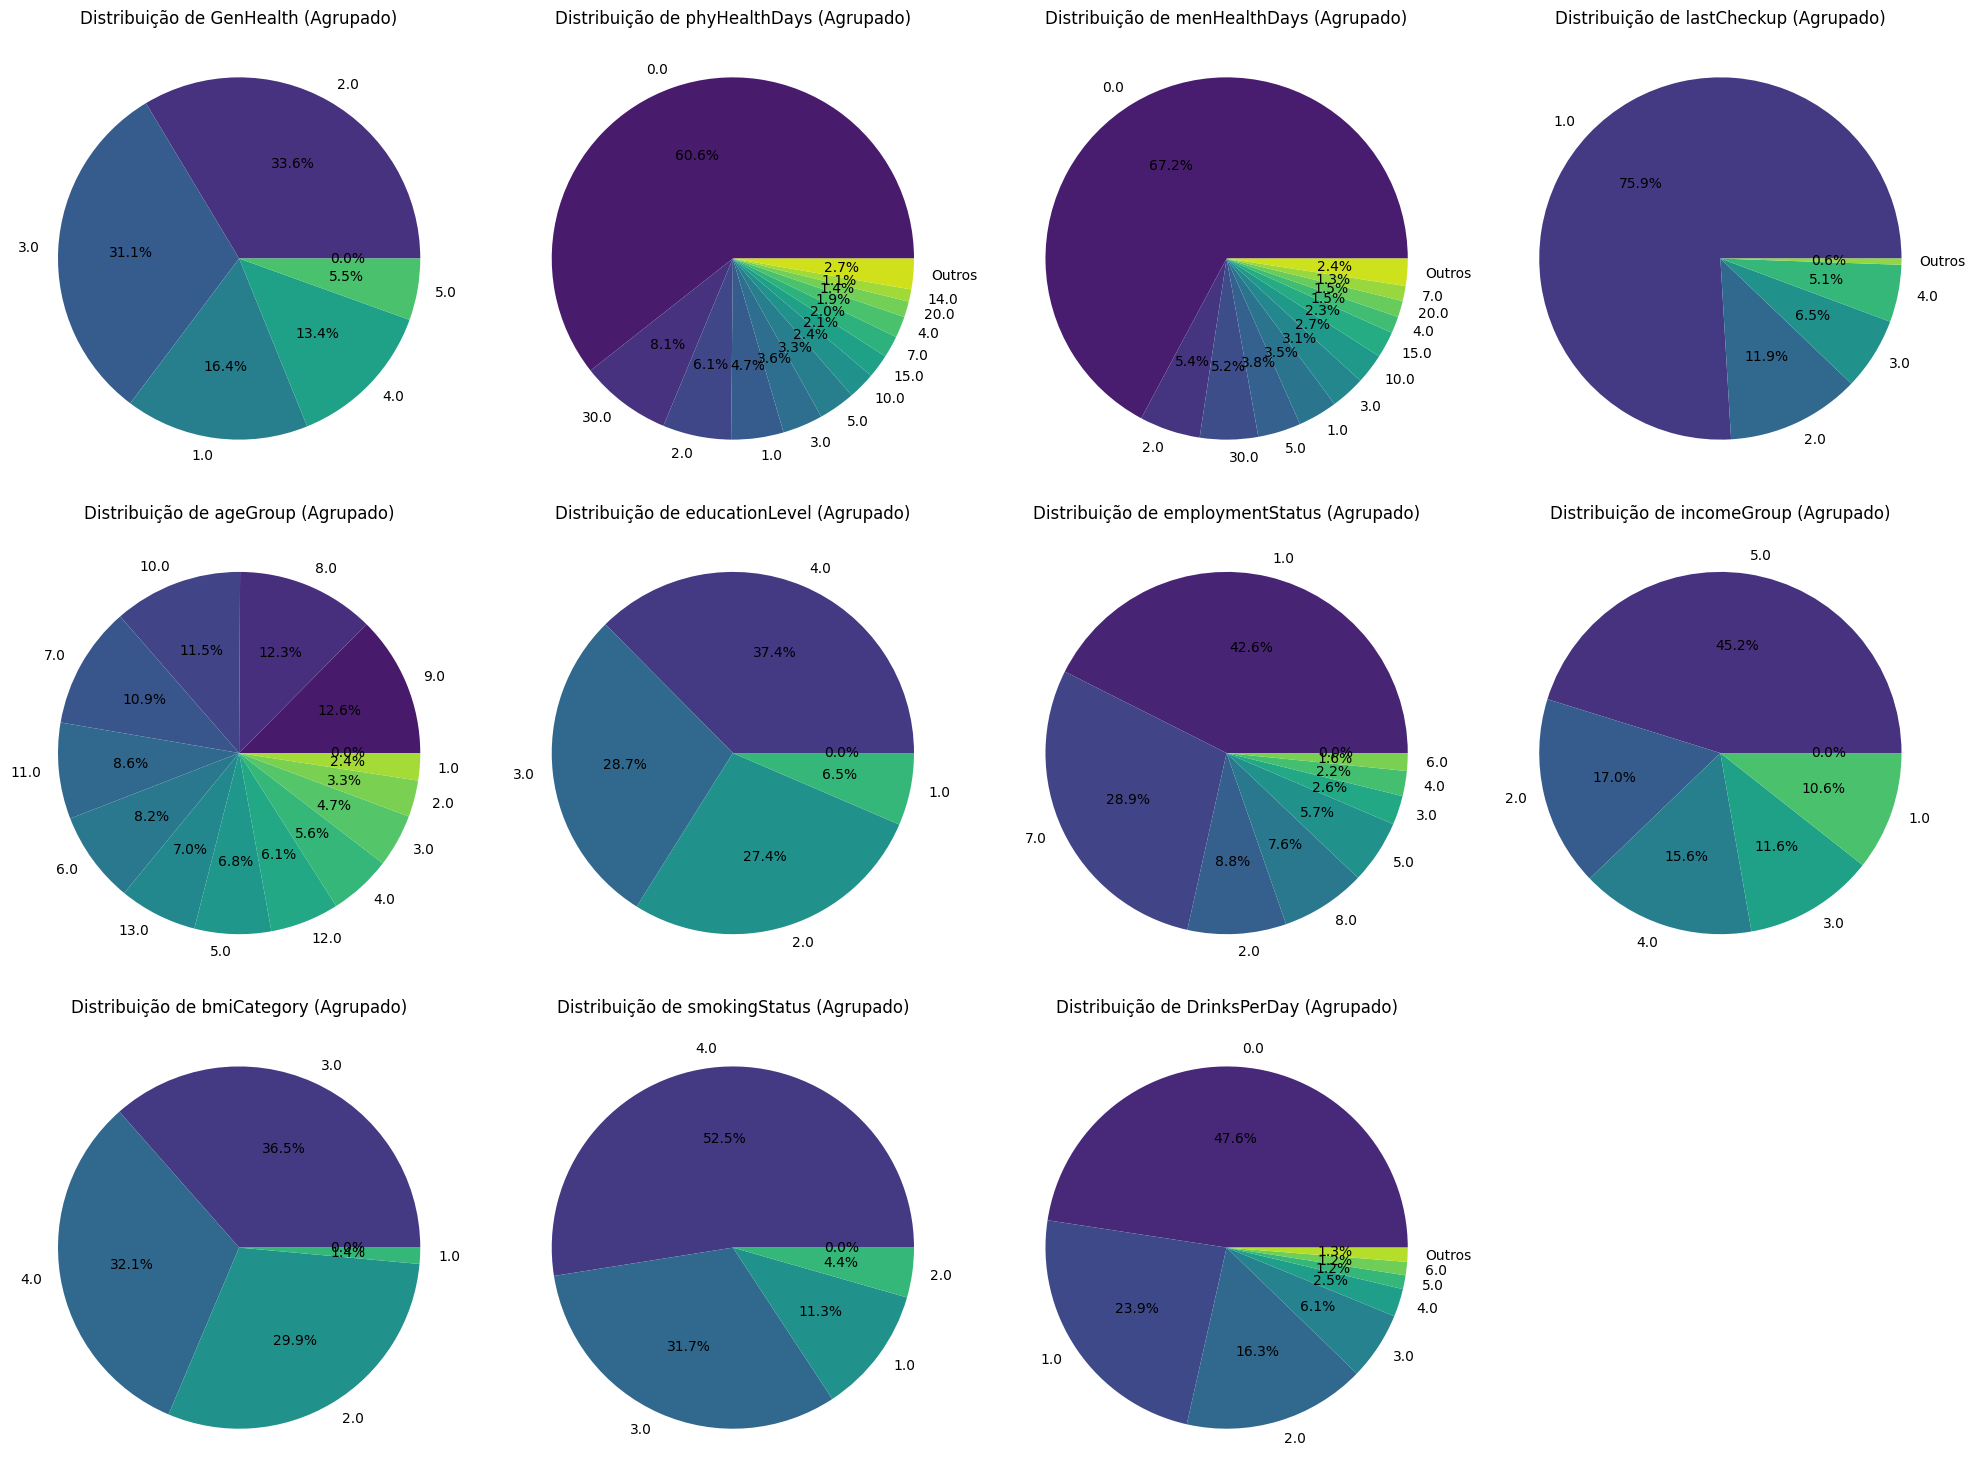

In [ ]:
categorical_cols = [col for col in brfss_df_selected.columns if brfss_df_selected[col].nunique() > 2]

lim = 2000
cols = 4
rows = math.ceil(len(categorical_cols) / cols)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(5 * cols, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    counts = brfss_df_selected[col].value_counts()

    # Separar categorias principais e agrupar as menos frequentes
    categorias_principais = counts[counts >= lim]
    outros = counts[counts < lim].sum()

    # Criar nova distribuição incluindo "Outros"
    nova_distribuicao = pd.concat([categorias_principais, pd.Series({'Outros': outros})])

    # Criar o gráfico de pizza
    nova_distribuicao.plot.pie(
        autopct='%1.1f%%',
        colors=sns.color_palette("viridis", len(nova_distribuicao)),
        ax=axes[i]
    )
    axes[i].set_title(f"Distribuição de {col} (Agrupado)")
    axes[i].set_ylabel("")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Balanceamento do dataset

In [ ]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 6.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import joblib  # To save and load the best model

# === Preprocessing & Splitting ===
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import KBinsDiscretizer

# === Handling Class Imbalance ===
from imblearn.over_sampling import SMOTEN, SMOTE  # For categorical and continuous data
from imblearn.under_sampling import ClusterCentroids

# === Model & Evaluation ===
from sklearn.naive_bayes import ComplementNB, CategoricalNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
)

def save_datasets(X_train, y_train, X_test, y_test, prefix="dataset"):
    X_train.to_csv(f"{prefix}_X_train.csv", index=False)
    y_train.to_csv(f"{prefix}_y_train.csv", index=False)
    X_test.to_csv(f"{prefix}_X_test.csv", index=False)
    y_test.to_csv(f"{prefix}_y_test.csv", index=False)

    print(f"Datasets salvos com prefixo '{prefix}'!")

def load_datasets(prefix="dataset"):
    X_train = pd.read_csv(f"{prefix}_X_train.csv")
    y_train = pd.read_csv(f"{prefix}_y_train.csv").squeeze()
    X_test = pd.read_csv(f"{prefix}_X_test.csv")
    y_test = pd.read_csv(f"{prefix}_y_test.csv").squeeze()

    print(f"Datasets carregados com prefixo '{prefix}'")
    return X_train, y_train, X_test, y_test

def save_train_dataset(X_train, y_train, prefix="train_dataset"):
    X_train.to_csv(f"{prefix}_X_train.csv", index=False)
    y_train.to_csv(f"{prefix}_y_train.csv", index=False)

    print(f"Dataset de treino salvo com prefixo '{prefix}'")

def load_train_dataset(prefix="train_dataset"):
    X_train = pd.read_csv(f"{prefix}_X_train.csv")
    y_train = pd.read_csv(f"{prefix}_y_train.csv").squeeze()

    print(f"Dataset de treino carregado com prefixo '{prefix}'")
    return X_train, y_train


## Separação do dataset em treino e teste


In [ ]:
# Separar features e target
X = brfss_df_selected.drop(columns=['diabetes'])
Y = brfss_df_selected['diabetes']

# A divisão do dataset será: 25% teste e 75% treino
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=42)

save_datasets(X_train, Y_train, X_test, Y_test, "unbalanced")
# X_train, Y_train, X_test, Y_test = load_datasets("unbalanced")

Datasets salvos com prefixo 'unbalanced'!


## Oversampling - SMOTEN

In [ ]:
x_tmp = X_train.copy()
y_tmp = Y_train.copy()

# Ensure all features are categorical (convert to type 'category')
for col in x_tmp.columns:
    x_tmp[col] = x_tmp[col].astype("category")

# Apply SMOTE-N to balance classes (works with categorical-only data)
X_over, Y_over = SMOTEN(random_state=42).fit_resample(x_tmp, y_tmp)

# Convert back to DataFrame
X_over = X_over.apply(lambda col: col.astype("category"))

save_train_dataset(X_over, Y_over, "over")
# X_over, Y_over = load_train_dataset("over")

Dataset de treino salvo com prefixo 'over'


## Undersampling - ClusterCentroids

In [ ]:
x_tmp = X_train.copy()
y_tmp = Y_train.copy()

cc = ClusterCentroids(random_state=42)
X_under, Y_under = cc.fit_resample(x_tmp, y_tmp)

save_train_dataset(X_under, Y_under, "under")
# X_under, Y_under = load_train_dataset("under")

Dataset de treino salvo com prefixo 'under'


# Treinamento

## Treinamento do modelo ComplementNB com o dataset desbalanceado

Fold 1 - F1-score: 0.7502
Fold 2 - F1-score: 0.7537
Fold 3 - F1-score: 0.7491
Fold 4 - F1-score: 0.7491

Best Model F1-score: 0.7536959197310764

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.87      0.80      0.83    170399
         1.0       0.30      0.43      0.36     35179

    accuracy                           0.73    205578
   macro avg       0.59      0.61      0.59    205578
weighted avg       0.77      0.73      0.75    205578



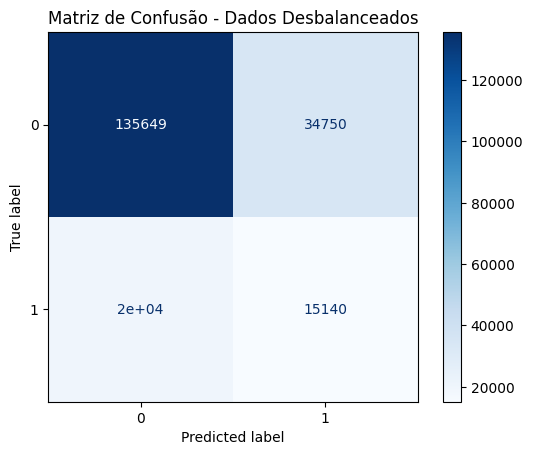

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.naive_bayes import ComplementNB
import joblib
import matplotlib.pyplot as plt

# K-Fold Cross Validation
kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

best_f1 = 0
best_model_unb = None

all_y_true = []
all_y_pred = []

for fold, (train_index, test_index) in enumerate(kf.split(X_train, Y_train)):
    X_fold_train, Y_fold_train = X_train.iloc[train_index], Y_train.iloc[train_index]
    X_fold_test, Y_fold_test = X_train.iloc[test_index], Y_train.iloc[test_index]

    model = ComplementNB()
    model.fit(X_fold_train, Y_fold_train)

    Y_pred = model.predict(X_fold_test)

    all_y_true.extend(Y_fold_test)
    all_y_pred.extend(Y_pred)

    f1 = f1_score(Y_fold_test, Y_pred, average='weighted')

    print(f"Fold {fold + 1} - F1-score: {f1:.4f}")

    if f1 > best_f1:
        best_f1 = f1
        best_model_unb = model

joblib.dump(best_model_unb, "best_complement_nb_unbalanced.pkl")

print("\nBest Model F1-score:", best_f1)

print("\nRelatório de Classificação:")
print(classification_report(all_y_true, all_y_pred))

# plot confusion matrix
cm = confusion_matrix(all_y_true, all_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - Dados Desbalanceados")
plt.show()

# Load the best model later if needed
# best_model_unb = joblib.load("best_complement_nb_unbalanced.pkl")


## Treinamento do modelo CategoricalNB com o dataset SMOTE

Fold 1 - F1-score: 0.7498
Fold 2 - F1-score: 0.7516
Fold 3 - F1-score: 0.7466
Fold 4 - F1-score: 0.7482

Best Model F1-score: 0.7515910391728188

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75    170399
         1.0       0.75      0.75      0.75    170399

    accuracy                           0.75    340798
   macro avg       0.75      0.75      0.75    340798
weighted avg       0.75      0.75      0.75    340798



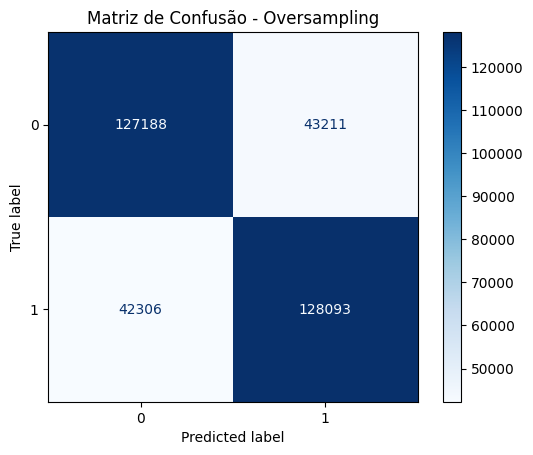

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.naive_bayes import CategoricalNB
import joblib
import matplotlib.pyplot as plt

# K-Fold Cross Validation
kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

best_f1 = 0
best_model_over = None

all_y_true = []
all_y_pred = []

for fold, (train_index, test_index) in enumerate(kf.split(X_over, Y_over)):
    X_fold_train, Y_fold_train = X_over.iloc[train_index], Y_over.iloc[train_index]
    X_fold_test, Y_fold_test = X_over.iloc[test_index], Y_over.iloc[test_index]

    Y_fold_train = Y_fold_train.values.ravel()

    model = CategoricalNB()
    model.fit(X_fold_train, Y_fold_train)

    Y_pred = model.predict(X_fold_test)

    all_y_true.extend(Y_fold_test.values)
    all_y_pred.extend(Y_pred)

    f1 = f1_score(Y_fold_test, Y_pred, average='weighted')

    print(f"Fold {fold + 1} - F1-score: {f1:.4f}")

    if f1 > best_f1:
        best_f1 = f1
        best_model_over = model

# Save
joblib.dump(best_model_over, "best_categorical_nb_oversampled.pkl")

print("\nBest Model F1-score:", best_f1)

print("\nRelatório de Classificação:")
print(classification_report(all_y_true, all_y_pred))

# plot confusion matrix
cm = confusion_matrix(all_y_true, all_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - Oversampling")
plt.show()

# Load the best model later if needed
# best_model_over = joblib.load("best_categorical_nb_oversampled.pkl")


## Treinamento do modelo categoricalNB com o dataset ClusterCentroids

Fold 1 - F1-score: 0.8230
Fold 2 - F1-score: 0.8229
Fold 3 - F1-score: 0.8248
Fold 4 - F1-score: 0.8251

Best Model F1-score: 0.8250993013962971

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.84      0.80      0.82     35179
         1.0       0.81      0.85      0.83     35179

    accuracy                           0.82     70358
   macro avg       0.82      0.82      0.82     70358
weighted avg       0.82      0.82      0.82     70358



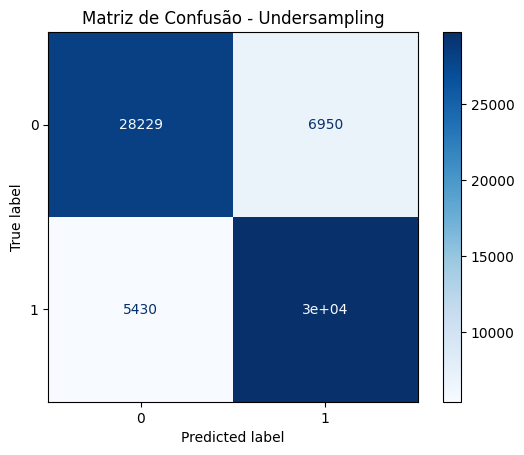

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.naive_bayes import CategoricalNB
import joblib
import matplotlib.pyplot as plt

# K-Fold Cross Validation
kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

best_f1 = 0
best_model_under = None

all_y_true = []
all_y_pred = []

for fold, (train_index, test_index) in enumerate(kf.split(X_under, Y_under)):
    X_fold_train, y_fold_train = X_under.iloc[train_index], Y_under.iloc[train_index]
    X_fold_test, y_fold_test = X_under.iloc[test_index], Y_under.iloc[test_index]

    model = CategoricalNB()
    model.fit(X_fold_train, y_fold_train)

    Y_pred = model.predict(X_fold_test)

    all_y_true.extend(y_fold_test.values)
    all_y_pred.extend(Y_pred)

    f1 = f1_score(y_fold_test, Y_pred, average='weighted')  # Ajuste conforme necessário

    print(f"Fold {fold + 1} - F1-score: {f1:.4f}")

    if f1 > best_f1:
        best_f1 = f1
        best_model_under = model

# save
joblib.dump(best_model_under, "best_categorical_nb_undersampling.pkl")

print("\nBest Model F1-score:", best_f1)

print("\nRelatório de Classificação:")
print(classification_report(all_y_true, all_y_pred))

# plot confusion matrix
cm = confusion_matrix(all_y_true, all_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - Undersampling")
plt.show()

# Load the best model later if needed
# best_model_under = joblib.load("best_categorical_nb_undersampling.pkl")


## Comparando os modelos

Relatório de Classificação para ComplementNB (Desbalanceado):
              precision    recall  f1-score   support

         0.0       0.87      0.80      0.83     56801
         1.0       0.31      0.43      0.36     11726

    accuracy                           0.74     68527
   macro avg       0.59      0.62      0.60     68527
weighted avg       0.78      0.74      0.75     68527

Recall: 0.7358, Precision: 0.7757, F1-score: 0.7525

Relatório de Classificação para CategoricalNB (Undersampling):
              precision    recall  f1-score   support

         0.0       0.94      0.48      0.64     56801
         1.0       0.25      0.85      0.39     11726

    accuracy                           0.55     68527
   macro avg       0.60      0.67      0.52     68527
weighted avg       0.82      0.55      0.60     68527

Recall: 0.5470, Precision: 0.8230, F1-score: 0.5968

Relatório de Classificação para CategoricalNB (Oversampling):
              precision    recall  f1-score   support

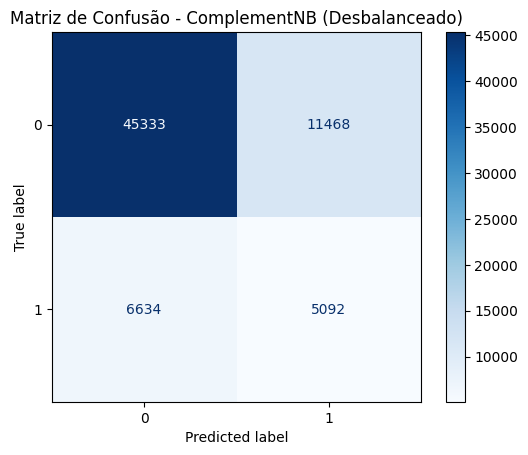

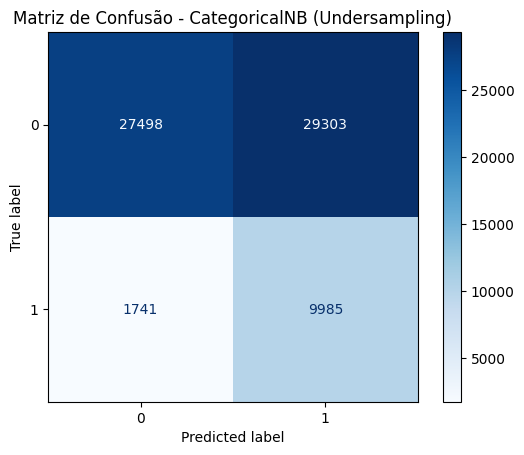

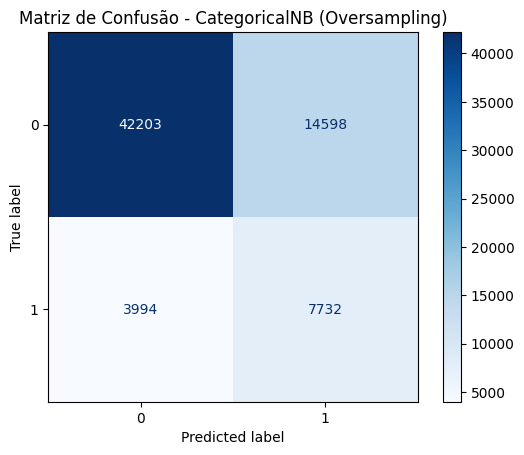

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, f1_score

# Load
# best_model_unb = joblib.load("best_complement_nb_unbalanced.pkl")
# best_model_under = joblib.load("best_categorical_nb_undersampling.pkl")
# best_model_over = joblib.load("best_categorical_nb_oversampled.pkl")

models = [best_model_unb, best_model_under, best_model_over]
model_names = ['ComplementNB (Desbalanceado)', 'CategoricalNB (Undersampling)', 'CategoricalNB (Oversampling)']

all_y_true = Y_test
all_y_pred = {name: [] for name in model_names}
metrics = {name: {'precision': 0, 'recall': 0, 'f1': 0} for name in model_names}

# Comparando os modelos
for model, model_name in zip(models, model_names):
    Y_pred = model.predict(X_test)
    all_y_pred[model_name] = Y_pred

    recall = recall_score(all_y_true, Y_pred, average='weighted')
    precision = precision_score(all_y_true, Y_pred, average='weighted')
    f1 = f1_score(all_y_true, Y_pred, average='weighted')

    metrics[model_name]['recall'] = recall
    metrics[model_name]['precision'] = precision
    metrics[model_name]['f1'] = f1

    print(f"Relatório de Classificação para {model_name}:")
    print(classification_report(all_y_true, Y_pred))
    print(f"Recall: {recall:.4f}, Precision: {precision:.4f}, F1-score: {f1:.4f}\n")

print("\nComparação entre os Modelos (Referência: Recall):")

for model_name in model_names:
    print(f"{model_name} - Recall: {metrics[model_name]['recall']:.4f}, Precision: {metrics[model_name]['precision']:.4f}, F1-score: {metrics[model_name]['f1']:.4f}")

for model_name in model_names:
    cm = confusion_matrix(all_y_true, all_y_pred[model_name])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Matriz de Confusão - {model_name}")
    plt.show()
